In [ ]:
!pip install PyMySQL

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.6 MB/s 


In [ ]:
import json
from sqlalchemy import create_engine
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, GRU, RepeatVector, TimeDistributed
import tensorflow as tf
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from keras import backend as K
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [ ]:
import matplotlib.pyplot as plt

# Prepare

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
json_path = '/content/drive/MyDrive/Colab Notebooks/config_colab.json'

with open(json_path) as json_file:
    config = json.load(json_file)

In [ ]:
json_path = '/content/drive/MyDrive/Colab Notebooks/config_colab.json'

with open(json_path) as json_file:
    config = json.load(json_file)

db_connection_str = "mysql+pymysql://{mysql_user}:{mysql_password}@{mysql_host}/{mysql_db}".format(
    mysql_user = config['database']['username'],
    mysql_password = config['database']['password'],
    mysql_host = config['database']['host'],
    mysql_db = config['database']['databasename']
    )

db_connection = create_engine(db_connection_str)

In [ ]:
df = pd.read_sql('SELECT * FROM klimatologi_semarang_2', con=db_connection)
df

,index,id_wmo,nama_statsiun,lintang,bujur,elevasi,Tanggal,temp_min(C),temp_max(C),temp_avg(C),kelembapan_avg(%),curah_hujan(mm),penyinaran_matahari(jam),kec_angin_max(m/s),arahAngintercepat(derajat),kec_angin_avg(m/s),arahAnginterbanyak,isFlood
0,0,96835,stasiun_klimatologi_semarang,-6.98470,110.38120,6,2010-01-01,24.3,30.8,27.6,78,0,4.5,3,360,3,N,0
1,1,96835,stasiun_klimatologi_semarang,-6.98470,110.38120,6,2010-01-02,25.2,31.6,27.8,80,8888,3.8,3,360,3,N,0
2,2,96835,stasiun_klimatologi_semarang,-6.98470,110.38120,6,2010-01-03,25.2,32,28.8,79,0,7.9,3,315,3,NW,0
3,3,96835,stasiun_klimatologi_semarang,-6.98470,110.38120,6,2010-01-04,24.8,32.4,27.8,82,69,6.2,4,180,4,S,0
4,4,96835,stasiun_klimatologi_semarang,-6.98470,110.38120,6,2010-01-05,25.4,31.4,28.1,78,2,6.1,3,135,3,SE,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,3283,96835,stasiun_klimatologi_semarang,-6.98470,110.38120,6,2020-12-27,26,31.6,28,85,1,8.1,5,360,2,C,0
4014,3284,96835,stasiun_klimatologi_semarang,-6.98470,110.38120,6,2020-12-28,25.4,31.4,28.1,86,2.4,6.6,5,320,2,C,0
4015,3285,96835,stasiun_klimatologi_semarang,-6.98470,110.38120,6,2020-12-29,26,31,27.7,90,13,5.8,4,360,2,C,0
4016,3286,96835,stasiun_klimatologi_semarang,-6.98470,110.38120,6,2020-12-30,25,29.8,27,88,3.4,4.4,4,190,2,C,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   index                       4018 non-null   int64 
 1   id_wmo                      4018 non-null   int64 
 2   nama_statsiun               4018 non-null   object
 3   lintang                     4018 non-null   object
 4   bujur                       4018 non-null   object
 5   elevasi                     4018 non-null   int64 
 6   Tanggal                     4018 non-null   object
 7   temp_min(C)                 4017 non-null   object
 8   temp_max(C)                 4017 non-null   object
 9   temp_avg(C)                 4017 non-null   object
 10  kelembapan_avg(%)           4017 non-null   object
 11  curah_hujan(mm)             4018 non-null   object
 12  penyinaran_matahari(jam)    4018 non-null   object
 13  kec_angin_max(m/s)          4017 non-null   obje

In [ ]:
df.describe()

,index,id_wmo,elevasi,isFlood
count,4018.000000,4018.0,4018.0,4018.000000
mean,1411.128173,96835.0,6.0,0.022648
std,994.360715,0.0,0.0,0.148797
min,0.000000,96835.0,6.0,0.000000
25%,502.000000,96835.0,6.0,0.000000
50%,1278.500000,96835.0,6.0,0.000000
75%,2282.750000,96835.0,6.0,0.000000
max,3287.000000,96835.0,6.0,1.000000


In [ ]:
df = df.drop_duplicates()

In [ ]:
# Convert to Float since data from MySQL considered as object
df["Tanggal"]= pd.to_datetime(df["Tanggal"])
df['temp_min(C)'] = pd.to_numeric(df['temp_min(C)'],errors = 'coerce')
df['temp_max(C)'] = pd.to_numeric(df['temp_max(C)'],errors = 'coerce')
df['temp_avg(C)'] = pd.to_numeric(df['temp_avg(C)'],errors = 'coerce')
df['kelembapan_avg(%)'] = pd.to_numeric(df['kelembapan_avg(%)'],errors = 'coerce')
df['curah_hujan(mm)'] = pd.to_numeric(df['curah_hujan(mm)'],errors = 'coerce')
df['penyinaran_matahari(jam)'] = pd.to_numeric(df['penyinaran_matahari(jam)'],errors = 'coerce')
df['kec_angin_max(m/s)'] = pd.to_numeric(df['kec_angin_max(m/s)'],errors = 'coerce')
df['arahAngintercepat(derajat)'] = pd.to_numeric(df['arahAngintercepat(derajat)'],errors = 'coerce')
df['kec_angin_avg(m/s)'] = pd.to_numeric(df['kec_angin_avg(m/s)'],errors = 'coerce')

df['temp_min(C)'].interpolate(method='linear', direction = 'forward', inplace=True)
df['temp_max(C)'].interpolate(method='linear', direction = 'forward', inplace=True)
df['temp_avg(C)'].interpolate(method='linear', direction = 'forward', inplace=True)
df['kelembapan_avg(%)'].interpolate(method='linear', direction = 'forward', inplace=True)
df['curah_hujan(mm)'].interpolate(method='linear', direction = 'forward', inplace=True)
df['penyinaran_matahari(jam)'].interpolate(method='linear', direction = 'forward', inplace=True)
df['kec_angin_max(m/s)'].interpolate(method='linear', direction = 'forward', inplace=True)
df['arahAngintercepat(derajat)'].interpolate(method='linear', direction = 'forward', inplace=True)
df['kec_angin_avg(m/s)'].interpolate(method='linear', direction = 'forward', inplace=True)

In [ ]:
'''
https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
'''
df = df[['Tanggal', 'curah_hujan(mm)', 'kelembapan_avg(%)', 'temp_max(C)']].copy(deep=True)
df.head()

,Tanggal,curah_hujan(mm),kelembapan_avg(%),temp_max(C)
0,2010-01-01,0.0,78.0,30.8
1,2010-01-02,8888.0,80.0,31.6
2,2010-01-03,0.0,79.0,32.0
3,2010-01-04,69.0,82.0,32.4
4,2010-01-05,2.0,78.0,31.4


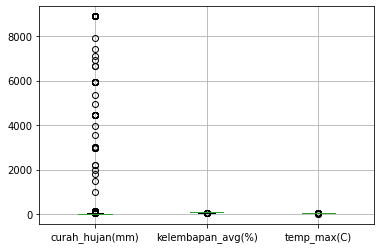

In [ ]:
df.boxplot()

In [ ]:
df

,Tanggal,curah_hujan(mm),kelembapan_avg(%),temp_max(C)
0,2010-01-01,0.0,78.0,30.8
1,2010-01-02,8888.0,80.0,31.6
2,2010-01-03,0.0,79.0,32.0
3,2010-01-04,69.0,82.0,32.4
4,2010-01-05,2.0,78.0,31.4
...,...,...,...,...
4013,2020-12-27,1.0,85.0,31.6
4014,2020-12-28,2.4,86.0,31.4
4015,2020-12-29,13.0,90.0,31.0
4016,2020-12-30,3.4,88.0,29.8


In [ ]:
df = df.dropna()
df.dtypes

Tanggal              datetime64[ns]
curah_hujan(mm)             float64
kelembapan_avg(%)           float64
temp_max(C)                 float64
dtype: object

In [ ]:
# df['curah_hujan(mm)'].replace({8888.0: ''}, inplace=True)
# df['curah_hujan(mm)'].interpolate(method='linear', direction = 'forward', inplace=True)
df

,Tanggal,curah_hujan(mm),kelembapan_avg(%),temp_max(C)
0,2010-01-01,0.0,78.0,30.8
1,2010-01-02,8888.0,80.0,31.6
2,2010-01-03,0.0,79.0,32.0
3,2010-01-04,69.0,82.0,32.4
4,2010-01-05,2.0,78.0,31.4
...,...,...,...,...
4013,2020-12-27,1.0,85.0,31.6
4014,2020-12-28,2.4,86.0,31.4
4015,2020-12-29,13.0,90.0,31.0
4016,2020-12-30,3.4,88.0,29.8


Normal curah hujan ini terbagi menjadi 3 kategori, yaitu rendah (0 – 100 mm), menengah ( 100 – 300 mm), dan tinggi (300 – 500 mm).

Sehingga data curah_hujan(mm) perlu dibersihkan dengan menghapus data dengan nilai >500.

In [ ]:
df = df.set_index('Tanggal').sort_index()

In [ ]:
res_time = '1D'
df = df.resample(res_time).mean()

In [ ]:
df['curah_hujan(mm)'].interpolate(method='linear', direction = 'forward', inplace=True)
df['kelembapan_avg(%)'].interpolate(method='linear', direction = 'forward', inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc7f572950>,
      dtype=object)

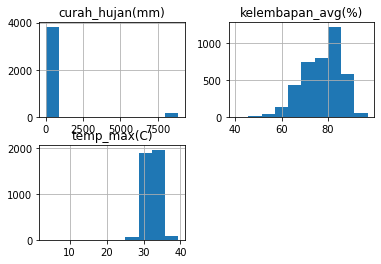

In [ ]:
df.hist()

In [ ]:
df.drop(df[df['curah_hujan(mm)'] >= 500].index, inplace = True)
# Normal curah hujan ini terbagi menjadi 3 kategori, yaitu rendah (0 – 100 mm), menengah ( 100 – 300 mm), tinggi (300 – 500 mm), dan sangat tinggi (>500 mm).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc7ef4d490>,
      dtype=object)

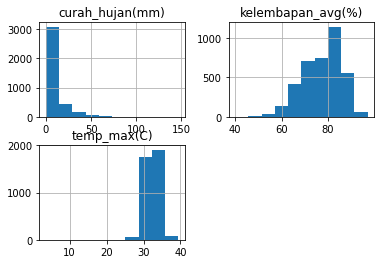

In [ ]:
df.hist()

In [ ]:
df

,curah_hujan(mm),kelembapan_avg(%),temp_max(C)
Tanggal,,,
2010-01-01,0.0,78.0,30.8
2010-01-03,0.0,79.0,32.0
2010-01-04,69.0,82.0,32.4
2010-01-05,2.0,78.0,31.4
2010-01-06,25.0,77.0,31.2
...,...,...,...
2020-12-27,1.0,85.0,31.6
2020-12-28,2.4,86.0,31.4
2020-12-29,13.0,90.0,31.0


In [ ]:
df.isna().sum()

curah_hujan(mm)      0
kelembapan_avg(%)    0
temp_max(C)          0
dtype: int64

In [ ]:
df = df.drop(index=df.iloc[-2:, :].index.tolist())

# Outdoor

In [ ]:
used_loss = 'mae'
epo = 180
b_size = 32

In [ ]:
train_data, test_data = train_test_split(df, shuffle=False, test_size=0.3)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_data) # or train
X_trainset = scaler.transform(train_data)
X_testset = scaler.transform(test_data)

In [ ]:
X_trainset = pd.DataFrame(X_trainset, columns=df.columns, index=train_data.index)
X_testset = pd.DataFrame(X_testset, columns=df.columns, index=test_data.index)

In [ ]:
X_trainset

,curah_hujan(mm),kelembapan_avg(%),temp_max(C)
Tanggal,,,
2010-01-01,0.000000,0.627451,0.447761
2010-01-03,0.000000,0.647059,0.537313
2010-01-04,0.470990,0.705882,0.567164
2010-01-05,0.013652,0.627451,0.492537
2010-01-06,0.170648,0.607843,0.477612
...,...,...,...
2017-10-13,0.027304,0.745098,0.597015
2017-10-14,0.020478,0.509804,0.656716
2017-10-15,0.000000,0.549020,0.597015


In [ ]:
X_testset

,curah_hujan(mm),kelembapan_avg(%),temp_max(C)
Tanggal,,,
2017-10-18,0.000000,0.705882,0.582090
2017-10-19,0.006826,0.607843,0.611940
2017-10-20,0.006826,0.588235,0.656716
2017-10-21,0.000000,0.588235,0.641791
2017-10-22,0.000000,0.529412,0.641791
...,...,...,...
2020-12-25,0.068259,0.686275,0.582090
2020-12-26,0.013652,0.764706,0.492537
2020-12-27,0.006826,0.764706,0.507463


In [ ]:
TIME_STEPS=1
def create_sequences(X, time_steps=TIME_STEPS):
  Xs = X.values.reshape(-1, time_steps, X.shape[1])
  return Xs

X_train = create_sequences(X_trainset)
X_test = create_sequences(X_testset)

In [ ]:
class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean 

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

codings_size = 10

inputs = keras.layers.Input(shape=[X_train.shape[1], X_train.shape[2]])
z = GRU(150, return_sequences=True)(inputs)
z = GRU(100, return_sequences=False)(z)

codings_mean = keras.layers.Dense(codings_size)(z)
codings_log_var = keras.layers.Dense(codings_size)(z)
codings = Sampling()([codings_mean, codings_log_var])

variational_encoder = keras.models.Model(
    inputs=[inputs], 
    outputs=[codings_mean, codings_log_var, codings]
    )

decoder_inputs = keras.layers.Input(shape=[codings_size])
x = RepeatVector(X_train.shape[1])(decoder_inputs)
x = GRU(100, return_sequences=True)(x)
x = GRU(150, return_sequences=True)(x)
outputs = TimeDistributed(Dense(X_train.shape[2], activation='linear'))(x)

variational_decoder = keras.models.Model(
    inputs=[decoder_inputs], 
    outputs=[outputs]
    )

_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)

variational_ae = keras.models.Model(
    inputs=[inputs], 
    outputs=[reconstructions]
    )


In [ ]:
latent_loss = -0.5 * K.sum(
    1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean),
    axis=-1
    )
variational_ae.add_loss(K.mean(latent_loss) / 784.)
variational_ae.compile(
    loss=used_loss, 
    optimizer=tf.keras.optimizers.Adam(lr=0.0001)
    )

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
variational_ae.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 3)]       0           []                               
                                                                                                  
 model (Functional)             [(None, 10),         147370      ['input_1[0][0]']                
                                 (None, 10),                                                      
                                 (None, 10)]                                                      
                                                                                                  
 model_1 (Functional)           (None, 1, 3)         147453      ['model[0][2]']                  
                                                                                            

In [ ]:
history = variational_ae.fit(X_train, X_train, 
                             epochs=epo, 
                             batch_size=b_size,
                             validation_data=(X_test, X_test),
                             shuffle=False)

Epoch 1/180
84/84 [==============================] - 15s 46ms/step - loss: 0.3637 - val_loss: 0.3114
Epoch 2/180
84/84 [==============================] - 1s 17ms/step - loss: 0.1932 - val_loss: 0.1408
Epoch 3/180
84/84 [==============================] - 1s 17ms/step - loss: 0.1248 - val_loss: 0.1146
Epoch 4/180
84/84 [==============================] - 1s 16ms/step - loss: 0.1121 - val_loss: 0.1078
Epoch 5/180
84/84 [==============================] - 1s 16ms/step - loss: 0.1095 - val_loss: 0.1057
Epoch 6/180
84/84 [==============================] - 1s 16ms/step - loss: 0.1066 - val_loss: 0.1044
Epoch 7/180
84/84 [==============================] - 1s 17ms/step - loss: 0.1063 - val_loss: 0.1053
Epoch 8/180
84/84 [==============================] - 1s 17ms/step - loss: 0.1054 - val_loss: 0.1026
Epoch 9/180
84/84 [==============================] - 1s 16ms/step - loss: 0.1035 - val_loss: 0.1025
Epoch 10/180
84/84 [==============================] - 1s 16ms/step - loss: 0.1029 - val_loss: 0.101

In [ ]:
reshaped = variational_ae.predict(X_test).reshape(-1, X_train.shape[2])
y_pred = pd.DataFrame(reshaped, columns=test_data.columns, index=test_data.index)
y_pred

36/36 [==============================] - 2s 4ms/step


,curah_hujan(mm),kelembapan_avg(%),temp_max(C)
Tanggal,,,
2017-10-18,0.052687,0.694474,0.529013
2017-10-19,0.031754,0.603911,0.586417
2017-10-20,0.029870,0.582593,0.605128
2017-10-21,0.029123,0.567350,0.613048
2017-10-22,0.034731,0.526778,0.632981
...,...,...,...
2020-12-25,0.040219,0.662861,0.548401
2020-12-26,0.052988,0.764775,0.496711
2020-12-27,0.056693,0.755299,0.496768


In [ ]:
y_test = X_testset.copy()
y_test

,curah_hujan(mm),kelembapan_avg(%),temp_max(C)
Tanggal,,,
2017-10-18,0.000000,0.705882,0.582090
2017-10-19,0.006826,0.607843,0.611940
2017-10-20,0.006826,0.588235,0.656716
2017-10-21,0.000000,0.588235,0.641791
2017-10-22,0.000000,0.529412,0.641791
...,...,...,...
2020-12-25,0.068259,0.686275,0.582090
2020-12-26,0.013652,0.764706,0.492537
2020-12-27,0.006826,0.764706,0.507463


# Visualization

## True vs Prediction Plot

In [ ]:
def plotpred(feature):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=y_test.index, y=y_test[feature], name='test'))
    fig.add_trace(go.Scatter(x=y_pred.index, y=y_pred[feature], name='pred'))
    fig.update_layout(title='{} - {} resampled'.format(feature, res_time))
    fig.show()

In [ ]:
for i in y_test.columns:
    plotpred(i)

In [ ]:
#RMSE/MAE computation using sklearn library
from sklearn.metrics import mean_squared_error, mean_absolute_error
np.sqrt(mean_squared_error(X_testset["kelembapan_avg(%)"], y_pred["kelembapan_avg(%)"]))

0.03350410216366719

In [ ]:
mean_absolute_error(X_testset["kelembapan_avg(%)"], y_pred["kelembapan_avg(%)"])

0.013840600015084982

In [ ]:
y_pred["kelembapan_avg(%)"]

Tanggal
2017-10-18    0.694474
2017-10-19    0.603911
2017-10-20    0.582593
2017-10-21    0.567350
2017-10-22    0.526778
                ...   
2020-12-25    0.662861
2020-12-26    0.764775
2020-12-27    0.755299
2020-12-28    0.784048
2020-12-29    0.845913
Name: kelembapan_avg(%), Length: 1145, dtype: float32

In [ ]:
X_testset["kelembapan_avg(%)"]

Tanggal
2017-10-18    0.705882
2017-10-19    0.607843
2017-10-20    0.588235
2017-10-21    0.588235
2017-10-22    0.529412
                ...   
2020-12-25    0.686275
2020-12-26    0.764706
2020-12-27    0.764706
2020-12-28    0.784314
2020-12-29    0.862745
Name: kelembapan_avg(%), Length: 1145, dtype: float64

In [ ]:
#calculating r2 using sklearn
from sklearn.metrics import r2_score
print(r2_score(X_testset["kelembapan_avg(%)"], y_pred["kelembapan_avg(%)"]))

0.9513525026521861


In [ ]:
#calculating r2 using sklearn
from sklearn.metrics import r2_score
print(r2_score(X_testset["curah_hujan(mm)"], y_pred["curah_hujan(mm)"]))

0.09099265723618988


In [ ]:
#calculating r2 using sklearn
from sklearn.metrics import r2_score
print(r2_score(X_testset["temp_max(C)"], y_pred["temp_max(C)"]))

0.5335794989020475


## Loss-Threshold Plot

In [ ]:
y_loss = pd.DataFrame(index=y_test.index)
y_loss = np.abs(y_pred-y_test)

In [ ]:
def lossplot(thres, feature):
  global y_loss
  y_loss['threshold_{}'.format(feature)] = thres
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=y_loss.index, y=y_loss[feature], name='Test loss'))
  fig.add_trace(go.Scatter(x=y_loss.index, y=y_loss['threshold_{}'.format(feature)], name='Threshold'))
  fig.update_layout(showlegend=True, title='Test loss vs. Threshold - {}'.format(feature))
  fig.show()

In [ ]:
lossplot(0.05, 'curah_hujan(mm)')

In [ ]:
lossplot(0.015, 'kelembapan_avg(%)')

## Anomaly Plot

In [ ]:
def anomplot(feature):
  global y_loss, y_test_anom
  y_loss['anomaly_{}'.format(feature)] = y_loss[feature] > y_loss['threshold_{}'.format(feature)]
  y_test_anom = pd.concat((y_test, y_loss['anomaly_{}'.format(feature)]), 1)

  y_temp = y_test_anom.loc[y_loss['anomaly_{}'.format(feature)]==True, feature]

  fig = go.Figure()
  fig.add_trace(go.Scatter(x=y_test_anom.index, y=y_test_anom[feature], name='test'))
  fig.add_trace(go.Scatter(x=y_temp.index, y=y_temp, mode='markers', name='anomaly'))
  fig.update_layout(title='{} - {} resampled'.format(feature, res_time))
  fig.show()

In [ ]:
anomplot('curah_hujan(mm)')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
anomplot('kelembapan_avg(%)')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



# Anomaly Detection


**Check skew & kurtosis**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



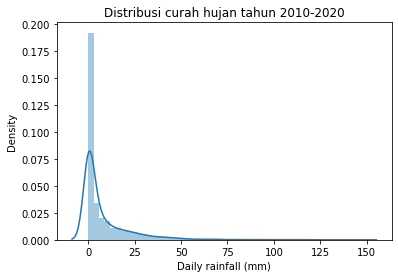

In [ ]:
plt.figure()
sns.distplot(df['curah_hujan(mm)'])
plt.title('Distribusi curah hujan tahun 2010-2020')
plt.xlabel("Daily rainfall (mm)")
plt.show()

In [ ]:
print("Skewness: %f" % df['curah_hujan(mm)'].skew())
print("Kurtosis: %f" % df['curah_hujan(mm)'].kurt())

Skewness: 3.440018
Kurtosis: 17.187911


Skewness (gambaran distribusi data/ ukuran kemiringan/ data simetris atau distribusi normal memiliki skeweness = 0). Dari data curah hujan diperoleh data yang highly skewed ke kanan, dapat dilihat bahwa ada unusual amounts of rain. Tidak ada hujan selama sekitar separuh dari rentang waktu tersebut.

Kurtosis (gambaran apakah data cenderung rata atau runcing/ tailedness) yang diperoleh pada data curah hujan juga cukup tinggi, menunjukkan cukup banyaknya outlier. 

## Isolation Forest

**Using Isolation Forest to detect Anomalies**

Isolation Forest: tree-based model untuk identifikasi outliers. 

In [ ]:
isolation_forest = IsolationForest(
    n_estimators=100, n_jobs=-1, random_state=42, contamination=0.1
)

isolation_forest.fit(df['curah_hujan(mm)'].values.reshape(-1, 1))

IsolationForest(contamination=0.1, n_jobs=-1, random_state=42)

In [ ]:
rain = np.linspace(
    df['curah_hujan(mm)'].min(),
    df['curah_hujan(mm)'].max(),
    len(df),
).reshape(-1, 1)

anomaly_score_rain = isolation_forest.decision_function(rain)

outlier_rain = isolation_forest.predict(rain)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



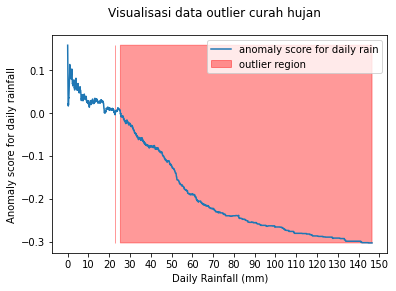

In [ ]:
# Plotting the outlier region
plt.figure()
plt.plot(rain, anomaly_score_rain, label="anomaly score for daily rain")
plt.fill_between(
    rain.T[0],
    np.min(anomaly_score_rain),
    np.max(anomaly_score_rain),
    where=outlier_rain == -1,
    color="r",
    alpha=0.4,
    label="outlier region",
)
plt.legend()
plt.ylabel("Anomaly score for daily rainfall")
plt.xlabel("Daily Rainfall (mm)")
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MultipleLocator(10))

plt.suptitle("Visualisasi data outlier curah hujan")
plt.show()

In [ ]:
# finding where the outlier region begins
idx = np.argwhere(np.diff(np.sign(anomaly_score_rain))).flatten()
rain[idx]

array([[22.59166011],
       [22.89902964],
       [25.35798584]])

In [ ]:
# when contamination, or the proportion of outliers, is set to 0.1/10% 
df[df['curah_hujan(mm)'] > 25.2].count()[0]

382

Selanjutnya analisis skewness, kurtosis, dan anomaly detection dari data temperatur maksimum - temp_max(C) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



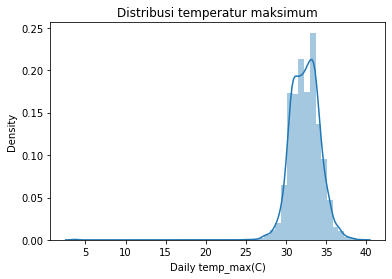

In [ ]:
plt.figure()
sns.distplot(df['temp_max(C)'] )
plt.title('Distribusi temperatur maksimum')
plt.xlabel("Daily temp_max(C)")
plt.show()

In [ ]:
print("Skewness: %f" % df['temp_max(C)'].skew())
print("Kurtosis: %f" % df['temp_max(C)'].kurt())

Skewness: -1.903076
Kurtosis: 30.016848


In [ ]:
isolation_forest = IsolationForest(
    n_estimators=500, n_jobs=-1, random_state=42, contamination=0.1
)

isolation_forest.fit(df['temp_max(C)'].values.reshape(-1, 1))

IsolationForest(contamination=0.1, n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
max_temp = np.linspace(
    df['temp_max(C)'].min(),
    df['temp_max(C)'].max(),
    len(df),
).reshape(-1, 1)

anomaly_score_maxtemp = isolation_forest.decision_function(max_temp)

outlier_maxtemp = isolation_forest.predict(max_temp)

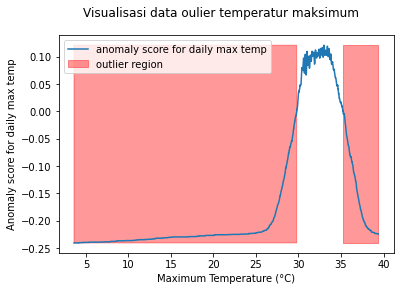

In [ ]:
plt.figure()
plt.plot(max_temp, anomaly_score_maxtemp, label='anomaly score for daily max temp')
plt.fill_between(max_temp.T[0], np.min(anomaly_score_maxtemp), np.max(anomaly_score_maxtemp), 
                 where=outlier_maxtemp==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('Anomaly score for daily max temp')
plt.xlabel('Maximum Temperature (°C)')

plt.suptitle("Visualisasi data oulier temperatur maksimum")
plt.show()

In [ ]:
# Checking on number of outliers in the "red zone"
df[(df['temp_max(C)'] < 28.5) | (df['temp_max(C)'] >= 33.8)].count()[0]

896

Analisis univariat dari curah hujan dan temperatur maksimum masing-masing menghasilkan lebih 300 entri outlier. Ini bermasalah karena menghapusnya berarti kehilangan sekitar 10% data.

Selanjutnya akan dicoba menggunakan **multivariate anomaly detection using PyOD**



## PyOD

In [ ]:
# Data pre-processing
cols = ['curah_hujan(mm)', 'temp_max(C)']
minmax = MinMaxScaler(feature_range=(0, 1))
df[cols] = minmax.fit_transform(df[cols])
df[cols].head()

,curah_hujan(mm),temp_max(C)
Tanggal,,
2010-01-01,0.000000,0.759777
2010-01-03,0.000000,0.793296
2010-01-04,0.470990,0.804469
2010-01-05,0.013652,0.776536
2010-01-06,0.170648,0.770950


In [ ]:
X1 = df['temp_max(C)'].values.reshape(-1,1)
X2 = df['curah_hujan(mm)'].values.reshape(-1,1)

X = np.concatenate((X1,X2), axis=1)

In [ ]:
pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 141 kB 5.3 MB/s 
  Created wheel for pyod: filename=pyod-1.0.6-py3-none-any.whl size=175099 sha256=88bc91eea0c70ba6f730dc17a2c3be7a601ab7e6f2aa444b5c1df2adeb1c90bd
  Stored in directory: /root/.cache/pip/wheels/5f/24/ba/b986cd4be81d12d0d11130aed62674291bf2da1b891de49aa1
Successfully built pyod


In [ ]:
from pyod.models.cblof import CBLOF
from pyod.models.iforest import IForest
from pyod.models.hbos import HBOS
from pyod.models.knn import KNN
from scipy import stats
import matplotlib as mpl

In [ ]:
outliers_fraction = 0.04

classifiers = {
    "Cluster-based Local Outlier Factor (CBLOF)": CBLOF(
        contamination=outliers_fraction, check_estimator=False, random_state=42
    ),
    "Histogram-base Outlier Detection (HBOS)": HBOS(contamination=outliers_fraction),
    "Isolation Forest": IForest(
        contamination=outliers_fraction, random_state=42, behaviour="new"
    ),
    "K Nearest Neighbors (KNN)": KNN(contamination=outliers_fraction),
}

OUTLIERS: 153 | INLIERS: 3661 | MODEL: Cluster-based Local Outlier Factor (CBLOF)


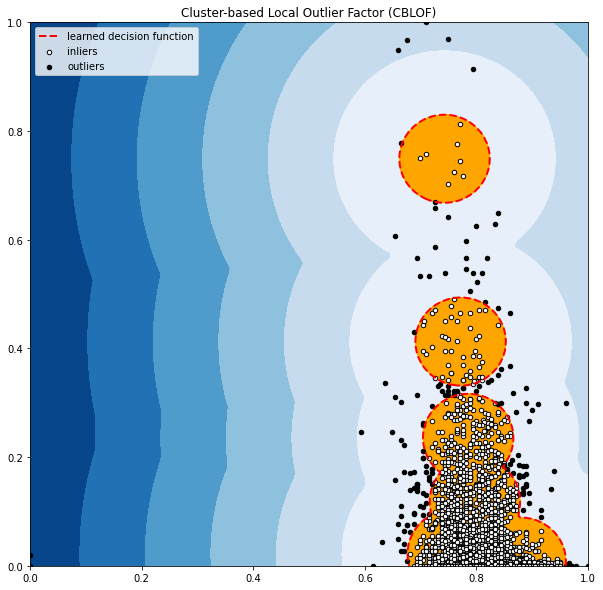

OUTLIERS: 150 | INLIERS: 3664 | MODEL: Histogram-base Outlier Detection (HBOS)


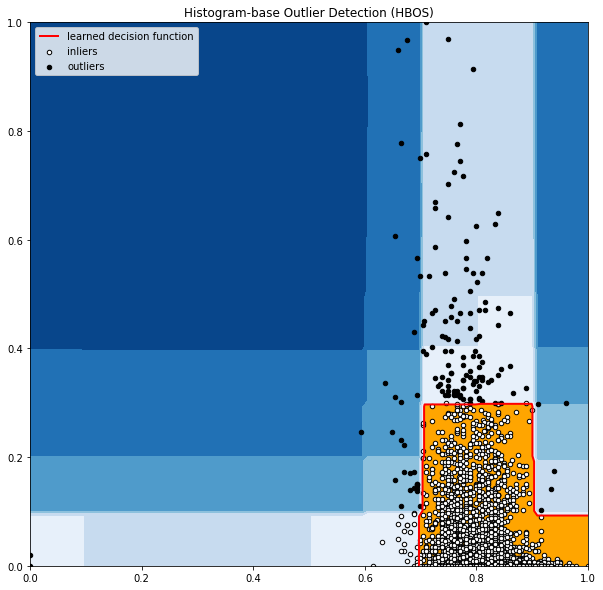

OUTLIERS: 153 | INLIERS: 3661 | MODEL: Isolation Forest


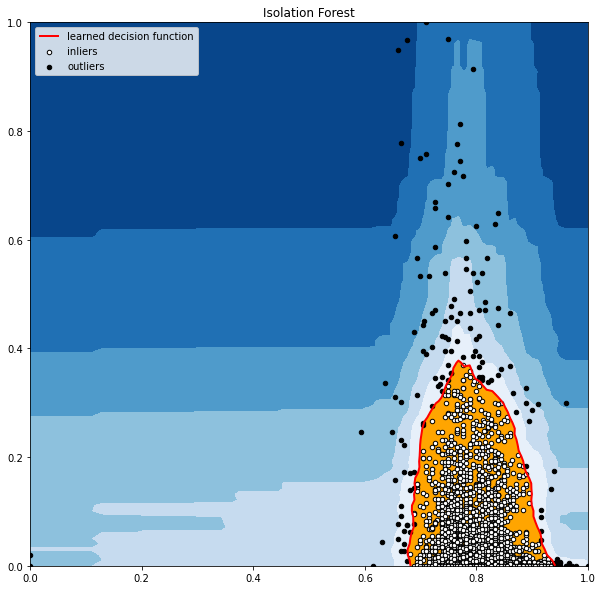

OUTLIERS: 132 | INLIERS: 3682 | MODEL: K Nearest Neighbors (KNN)


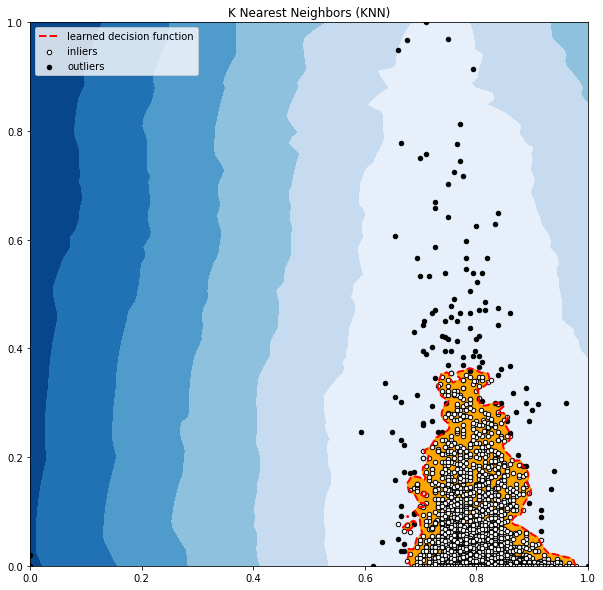

In [ ]:
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
outliers = []

for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X)
    
    # predict raw anomaly score
    scores_pred = clf.decision_function(X) * -1
        
    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    plt.figure(figsize=(10, 10))
    
    # copy of dataframe
    df = df.copy()
    df['outlier'] = y_pred.tolist()
    
    # creating a combined dataframe of outliers from the 4 models
    outliers.append(df.loc[df['outlier'] == 1])
    outliers_df = pd.concat(outliers) 
    
    # IN1 - inlier feature 1,  IN2 - inlier feature 2
    IN1 =  np.array(df['temp_max(C)'][df['outlier'] == 0]).reshape(-1,1)
    IN2 =  np.array(df['curah_hujan(mm)'][df['outlier'] == 0]).reshape(-1,1)
     
    
    # OUT1 - outlier feature 1, OUT2 - outlier feature 2
    OUT1 =  df['temp_max(C)'][df['outlier'] == 1].values.reshape(-1,1)
    OUT2 =  df['curah_hujan(mm)'][df['outlier'] == 1].values.reshape(-1,1)
         
    print('OUTLIERS:',n_outliers, '|', 'INLIERS:',n_inliers, '|', 'MODEL:',clf_name)
        
    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
        
    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
          
    # fill blue map colormap from minimum anomaly score to threshold value
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
    # draw red contour line where anomaly score is equal to thresold
    a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
           
    b = plt.scatter(IN1,IN2, c='white',s=20, edgecolor='k')
    
    c = plt.scatter(OUT1,OUT2, c='black',s=20, edgecolor='k')
       
    plt.axis('tight')  
    
    # loc=2 is used for the top left corner 
    plt.legend(
        [a.collections[0], b,c],
        ['learned decision function', 'inliers','outliers'],
        prop=mpl.font_manager.FontProperties(size=10),
        loc=2)
      
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.title(clf_name)
    plt.show()